In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/kivadata'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
       

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/kivadata/loan_themes_by_region.csv
/kaggle/input/kivadata/loan_theme_ids.csv
/kaggle/input/kivadata/kiva_loans.csv


In [2]:
df_loans=pd.read_csv('/kaggle/input/kivadata/kiva_loans.csv')

In [42]:
df_loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671205 entries, 0 to 671204
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  671205 non-null  int64  
 1   funded_amount       671205 non-null  float64
 2   loan_amount         671205 non-null  float64
 3   activity            671205 non-null  object 
 4   sector              671205 non-null  object 
 5   use                 666973 non-null  object 
 6   country_code        671197 non-null  object 
 7   country             671205 non-null  object 
 8   region              614405 non-null  object 
 9   currency            671205 non-null  object 
 10  partner_id          657698 non-null  float64
 11  posted_time         671205 non-null  object 
 12  disbursed_time      668809 non-null  object 
 13  funded_time         622874 non-null  object 
 14  term_in_months      671205 non-null  float64
 15  lender_count        671205 non-nul

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
use_label=cv.fit_transform(df_loans['activity'])
cv.get_feature_names_out()
use_label.toarray()

In [20]:
df2=df_loans.groupby('partner_id')['partner_id'].count().sort_values(ascending = False)

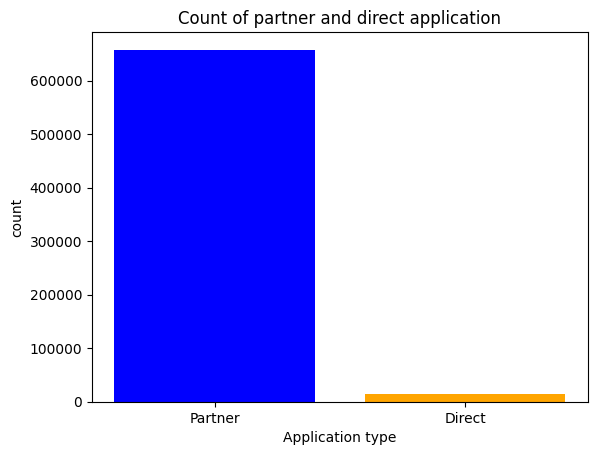

In [4]:
# Count non-null values
import matplotlib.pyplot as plt
non_null_count = df_loans['partner_id'].count()

# Count null values
null_count = df_loans['partner_id'].isnull().sum()

# Plot the bar plot
plt.bar(['Partner', 'Direct'], [non_null_count, null_count], color=['blue', 'orange'])
plt.xlabel('Application type')
plt.ylabel('count')
plt.title('Count of partner and direct application')
plt.show()

In [10]:
df_loans[['id','posted_time','disbursed_time','funded_time']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671205 entries, 0 to 671204
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   id              671205 non-null  int64 
 1   posted_time     671205 non-null  object
 2   disbursed_time  668809 non-null  object
 3   funded_time     622874 non-null  object
dtypes: int64(1), object(3)
memory usage: 20.5+ MB


In [11]:
df_loans=df_loans.dropna()

In [12]:
df_loans[['id','posted_time','disbursed_time','funded_time']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 423081 entries, 2 to 671141
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   id              423081 non-null  int64 
 1   posted_time     423081 non-null  object
 2   disbursed_time  423081 non-null  object
 3   funded_time     423081 non-null  object
dtypes: int64(1), object(3)
memory usage: 16.1+ MB


In [26]:
df_loans['LTA']=(pd.to_datetime(df_loans['funded_time'])-pd.to_datetime(df_loans['posted_time'])).dt.days
df_loans['LTA2']=(pd.to_datetime(df_loans['disbursed_time'])-pd.to_datetime(df_loans['posted_time'])).dt.days

In [29]:
df_loans[['id','posted_time','disbursed_time','funded_time','LTA','LTA2']]
df_loan_dis_mean=df_loans['LTA2'].mean()
df_loan_dis_mean

-15.254114460351564

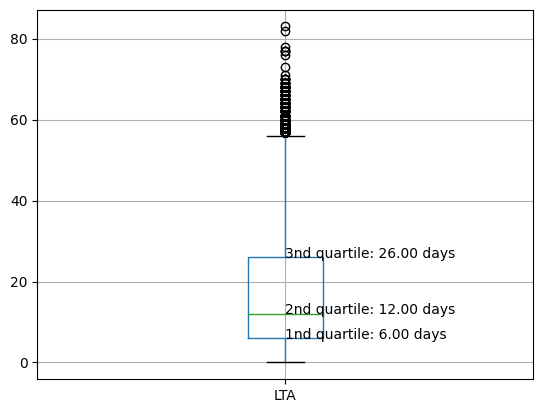

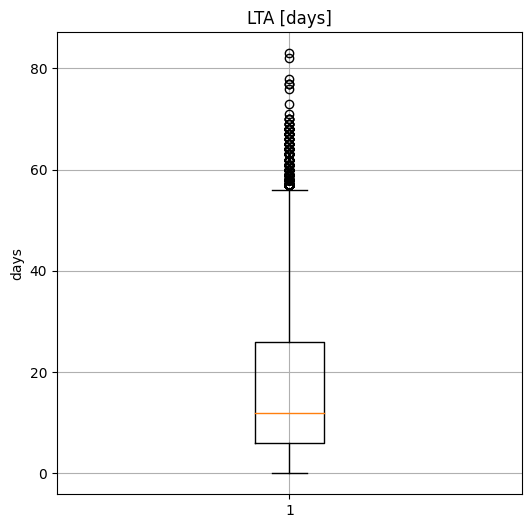

In [32]:
df_loans['LTA']=(pd.to_datetime(df_loans['funded_time'])-pd.to_datetime(df_loans['posted_time'])).dt.days
ax = df_loans.boxplot(column='LTA')

# Annotate the plot with quartile values
quartiles = df_loans['LTA'].quantile([0.25, 0.5, 0.75])
for i, quartile in enumerate(quartiles):
    ax.text(1, quartile, f'{i+1}nd quartile: {quartile:.2f} days', ha='left')
plt.figure(figsize=(6, 6))
plt.boxplot(df_loans['LTA'])
plt.title('LTA [days]')
plt.ylabel('days')
plt.grid(True)
plt.show()